# Practical Exam: House sales

RealAgents is a real estate company that focuses on selling houses.

RealAgents sells a variety of types of house in one metropolitan area.

Some houses sell slowly and sometimes require lowering the price in order to find a buyer.

In order to stay competitive, RealAgents would like to optimize the listing prices of the houses it is trying to sell.

They want to do this by predicting the sale price of a house given its characteristics.

If they can predict the sale price in advance, they can decrease the time to sale.


## Data

The dataset contains records of previous houses sold in the area.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton'. </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced" (two shared walls), "Semi-detached" (one shared wall), or "Detached" (no shared walls). </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |


# Task 1

The team at RealAgents knows that the city that a property is located in makes a difference to the sale price. 

Unfortuntately they believe that this isn't always recorded in the data. 

Calculate the number of missing values of the `city`. 

 - You should use the data in the file "house_sales.csv". 

 - Your output should be an object `missing_city`, that contains the number of missing values in this column. 

In [57]:
import pandas as pd

# Load the dataset, considering "--" as a missing value
df = pd.read_csv("house_sales.csv", na_values=["--"])

# Calculate the number of missing values in the "city" column
missing_city = df["city"].isnull().sum()

# Display the result
print("Number of missing values in the 'city' column:", missing_city)
print(df.columns)

Number of missing values in the 'city' column: 73
Index(['house_id', 'city', 'sale_price', 'sale_date', 'months_listed',
       'bedrooms', 'house_type', 'area'],
      dtype='object')


# Task 2 

Before you fit any models, you will need to make sure the data is clean. 

The table below shows what the data should look like. 

Create a cleaned version of the dataframe. 

 - You should start with the data in the file "house_sales.csv". 

 - Your output should be a dataframe named `clean_data`. 

 - All column names and values should match the table below.


| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton' </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced", "Semi-detached", or "Detached". </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |

In [58]:
import pandas as pd

# checked unique values and it showed -- as a value in city, replace to nan
df = pd.read_csv("house_sales.csv", na_values=["--"])

# missing values 'city'
df['city'].fillna("Unknown", inplace=True)
print("Unique values in 'city' column:", df['city'].unique())
# missing entries 'sale_price'
df.dropna(subset=['sale_price'], inplace=True)
# missing 'sale_date'
df['sale_date'].fillna("2023-01-01", inplace=True)
# missing 'months_listed'
df['months_listed'].fillna(df['months_listed'].mean().round(1), inplace=True)
print("Unique values in 'months_listed' column:", df['months_listed'].unique())
# missing 'bedrooms' 
print("Unique values in 'bedrooms' column:", df['bedrooms'].unique())
df['bedrooms'].fillna(round(df['bedrooms'].mean()), inplace=True)
# missing 'house_type' 
df['house_type'].replace({'Det.': 'Detached', 'Terr.': 'Terraced', 'Semi': 'Semi-detached'}, inplace=True)
print("Unique values in 'house_type' column:", df['house_type'].unique())
# missing values 'area' 
df['area'] = df['area'].str.replace(' sq.m.', '').astype(float)
df['area'].fillna(df['area'].mean(), inplace=True)
# make sure area is only float, no strings or nan
print("is 'area' column float:", df['area'].dtype)
print("missing values in 'area' column:", df['area'].isna().sum())

clean_data = df.copy()

Unique values in 'city' column: ['Silvertown' 'Riverford' 'Teasdale' 'Poppleton' 'Unknown']
Unique values in 'months_listed' column: [ 5.4  6.3  6.9  6.1  8.7  5.1  5.9  5.8  4.4  3.   4.6  3.7  6.2  5.3
  3.5  5.   5.5  7.8  4.9  4.7  8.9  3.8  4.8  7.6  6.4  7.9  6.6  4.1
  7.4  7.1  6.7  3.9  4.3  8.1  6.5  7.7  5.2  2.6  4.2  1.2  8.   5.6
  3.3  7.3  9.4  8.8  6.   3.6  3.2  8.5  4.5 10.4  9.2  1.7 10.2  0.8
  5.7  2.   2.3  8.6  7.5  9.6  9.7  6.8  2.2  2.5  4.   8.3 10.7  2.7
  3.4  7.   9.1  2.8  8.2 11.4 10.   2.9 10.1  7.2 10.5  9.9  3.1  9.3
  9.   1.3  8.4 11.   1.9 12.3  9.5  2.1  9.8  2.4  0.5 11.5  1.8  1.6
  1.5 10.8  1.4 11.6 10.3 10.6  0.6 11.3 11.7 11.8  1.1  1.  10.9]
Unique values in 'bedrooms' column: [2 5 6 4 3]
Unique values in 'house_type' column: ['Semi-detached' 'Detached' 'Terraced']
is 'area' column float: float64
missing values in 'area' column: 0
   house_id        city  sale_price  ... bedrooms     house_type   area
0   1217792  Silvertown       55943  .

# Task 3 

The team at RealAgents have told you that they have always believed that the number of bedrooms is the biggest driver of house price. 

Producing a table showing the difference in the average sale price by number of bedrooms along with the variance to investigate this question for the team.

 - You should start with the data in the file 'house_sales.csv'.

 - Your output should be a data frame named `price_by_rooms`. 

 - It should include the three columns `bedrooms`, `avg_price`, `var_price`. 

 - Your answers should be rounded to 1 decimal place.   

In [67]:
import pandas as pd

df = pd.read_csv("house_sales.csv", na_values=["--"])

# missing values 'city'
df['city'].fillna("Unknown", inplace=True)
print("Unique values in 'city' column:", df['city'].unique())
# missing entries 'sale_price'
df.dropna(subset=['sale_price'], inplace=True)
# missing 'sale_date'
df['sale_date'].fillna("2023-01-01", inplace=True)
# missing 'months_listed'
df['months_listed'].fillna(df['months_listed'].mean().round(1), inplace=True)
print("Unique values in 'months_listed' column:", df['months_listed'].unique())
# missing 'bedrooms' 
print("Unique values in 'bedrooms' column:", df['bedrooms'].unique())
df['bedrooms'].fillna(round(df['bedrooms'].mean()), inplace=True)
# missing 'house_type' 
df['house_type'].replace({'Det.': 'Detached', 'Terr.': 'Terraced', 'Semi': 'Semi-detached'}, inplace=True)
print("Unique values in 'house_type' column:", df['house_type'].unique())
# missing values 'area' 
df['area'] = df['area'].str.replace(' sq.m.', '').astype(float)
df['area'].fillna(df['area'].mean(), inplace=True)
# make sure area is only float, no strings or nan
print("is 'area' column float:", df['area'].dtype)
print("missing values in 'area' column:", df['area'].isna().sum())

# calc sale price per bedroom
price_by_rooms = df.groupby('bedrooms')['sale_price'].agg(['mean', 'var']).round(1).reset_index()
price_by_rooms.columns = ['bedrooms', 'avg_price', 'var_price']

price_by_rooms.head()


Unique values in 'city' column: ['Silvertown' 'Riverford' 'Teasdale' 'Poppleton' 'Unknown']
Unique values in 'months_listed' column: [ 5.4  6.3  6.9  6.1  8.7  5.1  5.9  5.8  4.4  3.   4.6  3.7  6.2  5.3
  3.5  5.   5.5  7.8  4.9  4.7  8.9  3.8  4.8  7.6  6.4  7.9  6.6  4.1
  7.4  7.1  6.7  3.9  4.3  8.1  6.5  7.7  5.2  2.6  4.2  1.2  8.   5.6
  3.3  7.3  9.4  8.8  6.   3.6  3.2  8.5  4.5 10.4  9.2  1.7 10.2  0.8
  5.7  2.   2.3  8.6  7.5  9.6  9.7  6.8  2.2  2.5  4.   8.3 10.7  2.7
  3.4  7.   9.1  2.8  8.2 11.4 10.   2.9 10.1  7.2 10.5  9.9  3.1  9.3
  9.   1.3  8.4 11.   1.9 12.3  9.5  2.1  9.8  2.4  0.5 11.5  1.8  1.6
  1.5 10.8  1.4 11.6 10.3 10.6  0.6 11.3 11.7 11.8  1.1  1.  10.9]
Unique values in 'bedrooms' column: [2 5 6 4 3]
Unique values in 'house_type' column: ['Semi-detached' 'Detached' 'Terraced']
is 'area' column float: float64
missing values in 'area' column: 0


,bedrooms,avg_price,var_price
0,2,67076.4,5.652896e+08
1,3,154665.1,2.378289e+09
2,4,234704.6,1.725211e+09
3,5,301515.9,2.484328e+09
4,6,375741.3,3.924432e+09


# Task 4

Fit a baseline model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `base_result`, that includes `house_id` and `price`. The price column must be your predicted values.

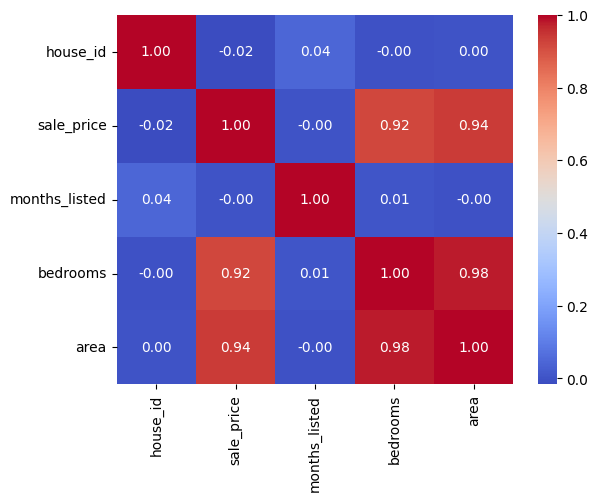

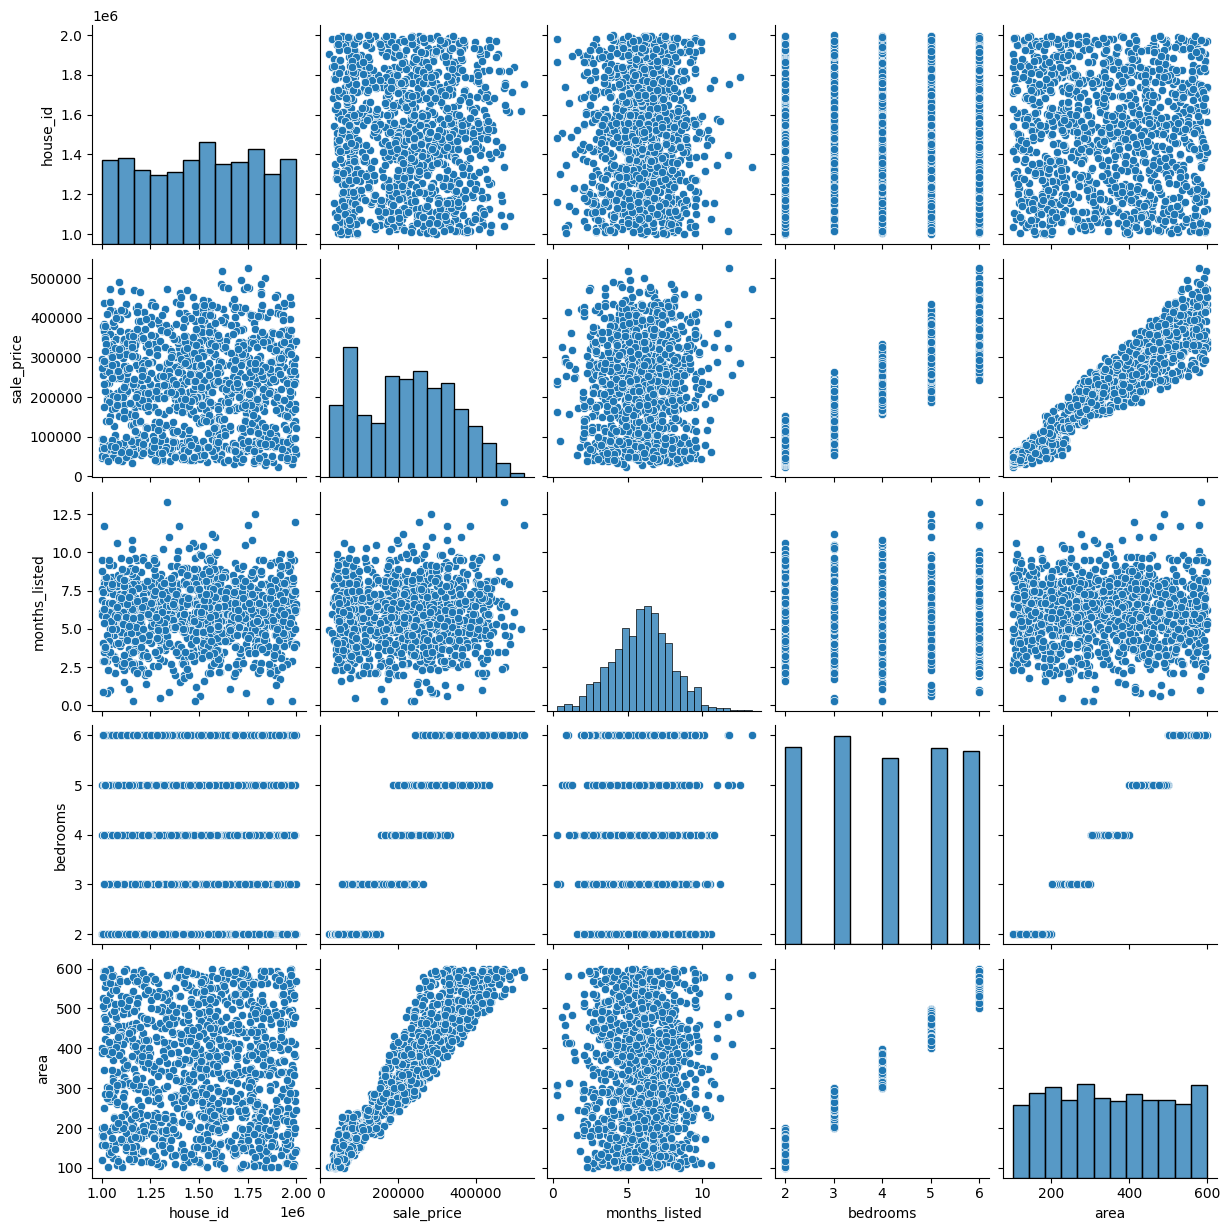

     house_id          price
0     1331375  118876.064865
1     1630115  257484.218145
2     1645745  383988.545816
3     1336775  117832.366475
4     1888274  256378.708250
..        ...            ...
295   1986255  346927.895640
296   1896276  365824.062222
297   1758223  239461.905292
298   1752010  181628.645653
299   1651404  353313.370823

[300 rows x 2 columns]


In [87]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('train.csv')
test = pd.read_csv('validation.csv')

# check corr
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

sns.pairplot(train)
plt.show()

# reg
X_train = train.drop(['city', 'sale_date', 'sale_price', 'house_id', 'house_type'], axis=1)
y_train = train['sale_price']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
X_validation = test[X_train.columns]
X_validation_scaled = scaler.transform(X_validation)
y_pred = model.predict(X_validation_scaled)

compare_result = pd.DataFrame({'house_id': test['house_id'], 'price': y_pred.flatten()})
print(compare_result)

# Task 5

Fit a comparison model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `compare_result`, that includes `house_id` and `price`. The price column must be your predicted values.

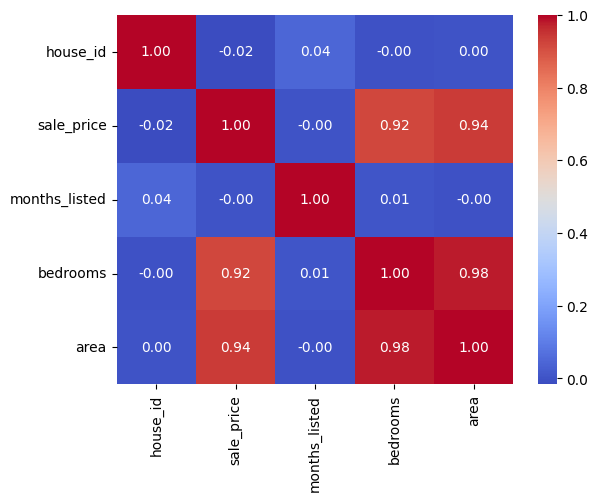

     house_id          price
0     1331375  118877.319960
1     1630115  257482.852606
2     1645745  383988.397999
3     1336775  117833.595855
4     1888274  256377.443992
..        ...            ...
295   1986255  346929.644238
296   1896276  365824.653483
297   1758223  239461.141738
298   1752010  181627.455065
299   1651404  353314.555403

[300 rows x 2 columns]


In [86]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('train.csv')
test = pd.read_csv('validation.csv')

# check corr to keep the most relevant
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Lasso
X_train = train.drop(['city','sale_date','sale_price', 'house_id','house_type'], axis=1)
y_train = train['sale_price']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

lasso_model = Lasso(alpha=0.1, random_state=42)  
lasso_model.fit(X_train_scaled, y_train)
X_validation = test[X_train.columns]
X_validation_scaled = scaler.transform(X_validation)
y_pred = lasso_model.predict(X_validation_scaled)

compare_result = pd.DataFrame({'house_id': test['house_id'], 'price': y_pred.flatten()})
print(compare_result)